In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style; mpl_style(dark=True)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
nb_version = "v3"

In [3]:
df_train = pd.read_csv(f'../../data/processed/df_train_{nb_version}.csv', index_col=[0])
df_test = pd.read_csv(f'../../data/processed/df_test_{nb_version}.csv', index_col=[0])
display(f'Train: {df_train.shape}', df_train.head(), f'Test: {df_test.shape}', df_test.head())

'Train: (8400, 8)'

,index,output,Ia,Ib,Ic,Va,Vb,Vc
0,11295,0,0.021636,-0.011753,-0.025728,1.656374,-0.510284,-1.115444
1,2656,1,0.586400,-2.360192,-0.235266,-0.126077,0.465125,-0.351109
2,166,0,0.148467,-0.026999,-0.156712,0.470996,1.197159,-1.690071
3,9307,1,-2.046694,2.200021,-0.040130,-0.034315,0.138725,-0.107970
4,11780,0,0.126816,0.093206,-0.281670,0.056748,1.490284,-1.580388


'Test: (3601, 8)'

,index,output,Ia,Ib,Ic,Va,Vb,Vc
0,6137,0,0.110021,-0.029281,-0.098232,1.135295,0.560390,-1.695449
1,5081,1,-0.061254,-1.605868,1.985340,-1.282324,-0.029624,1.297914
2,8976,1,-1.981546,-0.039258,2.531585,-0.144773,0.140436,-0.000529
3,5319,1,0.078802,0.710927,-0.935010,1.413691,0.148584,-1.549449
4,1390,1,-1.670122,0.062302,-0.186400,-0.683960,1.571532,-0.931281


In [4]:
X_train = df_train.drop(['index','output'], axis=1)
Y_train = df_train['output']
X_test = df_test.drop(['index','output'], axis=1)
Y_test = df_test['output']

In [5]:
model_ann = Sequential()
model_ann.add(Dense(units=6, activation='relu', input_shape=(6,)))
model_ann.add(Dense(units=6, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model_ann.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
263/263 [==============================] - 3s 6ms/step - loss: 0.6035 - accuracy: 0.6599 - val_loss: 0.4979 - val_accuracy: 0.8128
Epoch 2/100
263/263 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8912 - val_loss: 0.3137 - val_accuracy: 0.9125
Epoch 3/100
263/263 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9299 - val_loss: 0.2111 - val_accuracy: 0.9353
Epoch 4/100
263/263 [==============================] - 1s 3ms/step - loss: 0.1720 - accuracy: 0.9498 - val_loss: 0.1466 - val_accuracy: 0.9517
Epoch 5/100
263/263 [==============================] - 1s 3ms/step - loss: 0.1190 - accuracy: 0.9642 - val_loss: 0.1088 - val_accuracy: 0.9603
Epoch 6/100
263/263 [==============================] - 1s 5ms/step - loss: 0.0907 - accuracy: 0.9720 - val_loss: 0.0879 - val_accuracy: 0.9692
Epoch 7/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.0767 - val_accuracy: 0.9720

In [7]:
loss_train, acc_train = model_ann.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss_train)
print('Train acc:', acc_train)
loss_test, acc_test = model_ann.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test acc:', acc_test)

Train loss: 0.013219590298831463
Train acc: 0.9939285516738892
Test loss: 0.013515863567590714
Test acc: 0.9947236776351929


In [8]:
losses = pd.DataFrame(hist.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.603457,0.659881,0.497935,0.812830
1,0.400058,0.891190,0.313715,0.912524
2,0.253111,0.929881,0.211118,0.935296
3,0.172034,0.949762,0.146597,0.951680
4,0.118983,0.964167,0.108803,0.960289
...,...,...,...,...
95,0.014212,0.994048,0.014205,0.994446
96,0.014341,0.994048,0.014070,0.994724
97,0.014138,0.993929,0.013388,0.994724
98,0.014303,0.994048,0.013713,0.995001


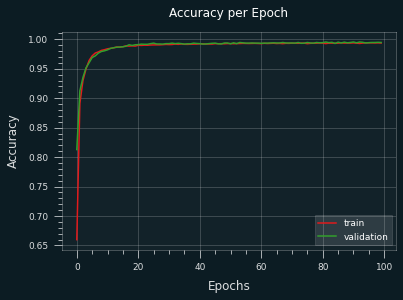

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

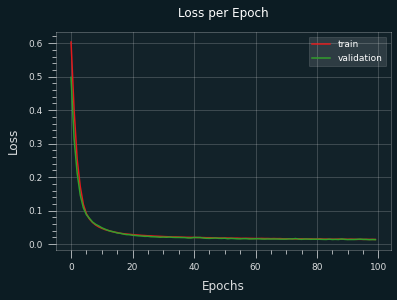

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
Y_train_pred = model_ann.predict(X_train)
Y_test_pred = model_ann.predict(X_test)
Y_train_pred = np.where(Y_train_pred < 0.5, 0, 1)
Y_test_pred = np.where(Y_test_pred < 0.5, 0, 1)
Y_train_pred = np.reshape(Y_train_pred, len(Y_train_pred))
Y_test_pred = np.reshape(Y_test_pred, len(Y_test_pred))
cmf_train = confusion_matrix(Y_train, Y_train_pred)
cmf_test = confusion_matrix(Y_test, Y_test_pred)

113/113 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Confusion Matrix from Training Set')

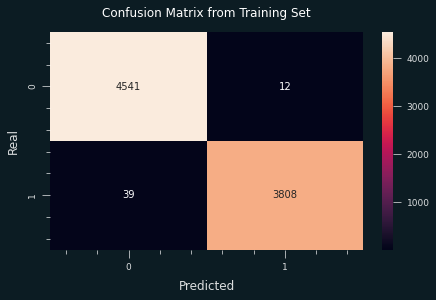

In [12]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_train, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Training Set')

In [13]:
print(classification_report(Y_train, Y_train_pred), digits=5)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4553
           1       1.00      0.99      0.99      3847

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



Text(0.5, 1.0, 'Confusion Matrix from Test Set')

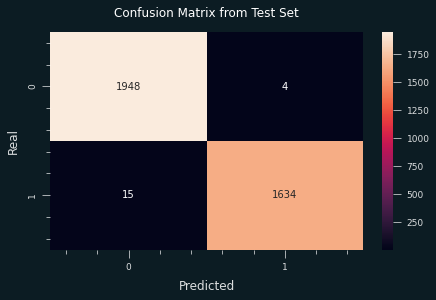

In [14]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_test, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Test Set')

In [15]:
print(classification_report(Y_test, Y_test_pred), digits=5)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1952
           1       1.00      0.99      0.99      1649

    accuracy                           0.99      3601
   macro avg       0.99      0.99      0.99      3601
weighted avg       0.99      0.99      0.99      3601

